# CONTRASTES DE HIPÓTESIS DEL TITANIC

En este Notebook haremos un breve repaso sobre los contrastes de hipótesis, cómo plantearlos y cómo interpretar los resultados, de cara a practicar nuestras habilidades estadísticas.

## Importamos Librerías y limpiamos data (borramos nulos)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

titanic_data = sns.load_dataset('titanic')
titanic_data.dropna(inplace=True)

In [2]:
titanic_data # Vemos algunos datos

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [3]:
ds=titanic_data.copy() # Hacemos una copia del dataset por seguridad

In [4]:
ds.dtypes # Vemos los tipos de datos de las columnas

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

### Hipótesis 1: La ratio de hombres solos era significativamente superior a la ratio de mujeres solas

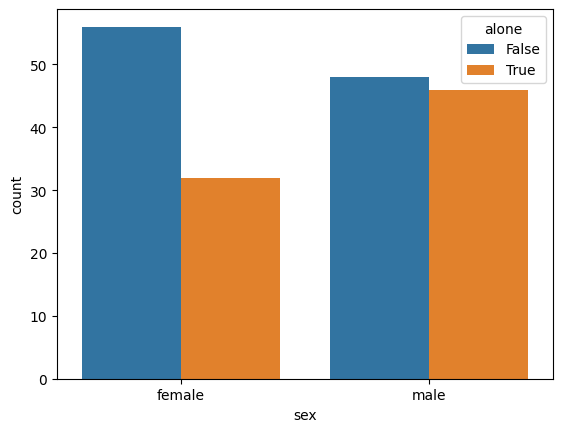

In [5]:
sns.countplot(data=ds, x='sex' , hue='alone')
plt.show()

In [6]:
contingency_table = pd.crosstab(ds['sex'], ds['alone'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que la proporción de hombres y mujeres solitarios es la misma')
else:
    print('No podemos rechazar la hipótesis nula de la proporción de hombres y mujeres solitarios es la misma, por lo que no es la misma')

Chi2: 2.442673073823341 P-value: 0.11807486356916395
No podemos rechazar la hipótesis nula de la proporción de hombres y mujeres solitarios es la misma, por lo que no es la misma


In [7]:
contingency_table

alone,False,True
sex,,
female,56,32
male,48,46


### Hipótesis 2: La ratio de supervivencia entre las personas que viajaban solas era significativamente superior a la de las que viajaban acompañadas

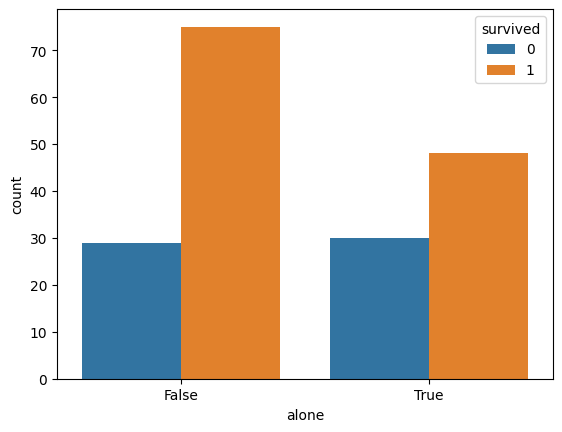

In [8]:
sns.countplot(data=ds, x='alone' , hue='survived')
plt.show()

In [9]:
contingency_table = pd.crosstab(ds['survived'], ds['alone'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que la tasa de supervivencia de personas solitarios es la misma')
else:
    print('No podemos rechazar la hipótesis nula de que la tasa de supervivencia de personas solitarios es la misma')

Chi2: 1.818766937669377 P-value: 0.17746012166058867
No podemos rechazar la hipótesis nula de que la tasa de supervivencia de personas solitarios es la misma


In [10]:
contingency_table

alone,False,True
survived,,
0,29,30
1,75,48


### Hipótesis 3: Las mujeres en primera clase sobrevivieron significativamente más que las mujeres en otras clases

In [11]:
mujeres_ricas = ds[(ds["sex"]=="female") & (ds["pclass"]==1)]["survived"] 
# creamos un dataset con todos los datos del ds original donde el sexo es femenino y la clase es 1
mujeres_no_ricas = ds[(ds["sex"]=="female") & (ds["pclass"]!=1)]["survived"]
# creamos un dataset con todos los datos del ds original donde el sexo es femenino también y la clase no es 1 (es decir, es 2 o 3)

In [12]:
mujeres_ricas

1      1
3      1
11     1
52     1
88     1
      ..
853    1
862    1
871    1
879    1
887    1
Name: survived, Length: 74, dtype: int64

In [13]:
mujeres_no_ricas

10     1
66     1
123    1
205    0
251    0
327    1
345    1
394    1
473    1
516    1
618    1
717    1
772    0
823    1
Name: survived, dtype: int64

In [14]:
t_stats, p_value = stats.ttest_ind(mujeres_ricas, mujeres_no_ricas)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que la ratio de supervivencia entre mujeres de 1 clase fue la misma que entre las mujeres de las demás clases')
else:
    print('No podemos rechazar la hipótesis nula de que la ratio de supervivencia entre mujeres de 1 clase fue la misma que entre las mujeres de las demás clases')

T-estadístico: 2.4161314264733105 P-value: 0.01780199088446324
Rechazamos la hipótesis nula de que la ratio de supervivencia entre mujeres de 1 clase fue la misma que entre las mujeres de las demás clases


### Hipótesis 4: Las mujeres pagaron, de media, significativamente más que los hombres

In [15]:
tarifa_mujeres = ds[(ds["sex"]=="female")]["fare"] 
# creamos un dataset con todos los datos del ds original donde el sexo es femenino y seleccionamos la columna de tarifas
tarifa_hombres = ds[(ds["sex"]=="male")]["fare"]
# creamos un dataset con todos los datos del ds original donde el sexo es masculino y seleccionamos la columna de tarifas

In [16]:
tarifa_mujeres

1      71.2833
3      53.1000
10     16.7000
11     26.5500
52     76.7292
        ...   
853    39.4000
862    25.9292
871    52.5542
879    83.1583
887    30.0000
Name: fare, Length: 88, dtype: float64

In [17]:
tarifa_hombres

6       51.8625
21      13.0000
23      35.5000
27     263.0000
54      61.9792
         ...   
806      0.0000
857     26.5500
867     50.4958
872      5.0000
889     30.0000
Name: fare, Length: 94, dtype: float64

In [18]:
t_stats, p_value = stats.ttest_ind(tarifa_mujeres, tarifa_hombres)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que las mujeres pagaron la misma tarifa en promedio que los hombres')
else:
    print('No Rechazamos la hipótesis nula de que las mujeres pagaron la misma tarifa en promedio que los hombres')

T-estadístico: 1.7297833257895099 P-value: 0.08538316532960831
No Rechazamos la hipótesis nula de que las mujeres pagaron la misma tarifa en promedio que los hombres


In [19]:
print(f"tarifa promedio hombres: {tarifa_hombres.mean()}\nTarifa promedio mujeres: {tarifa_mujeres.mean()}")

tarifa promedio hombres: 69.4820489361702
Tarifa promedio mujeres: 89.0009


<Axes: xlabel='fare', ylabel='Count'>

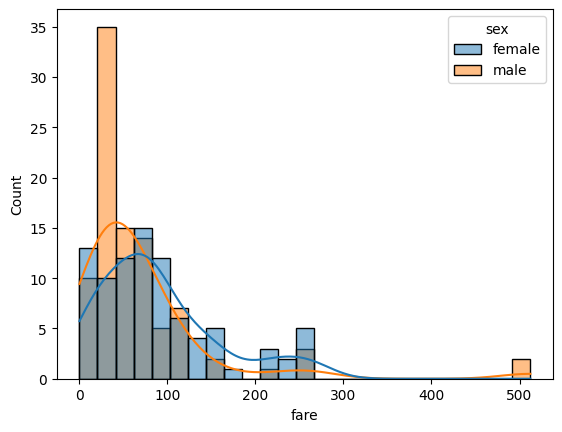

In [20]:
sns.histplot(data=ds, x='fare', hue="sex", kde=True)

Quizá con una mayor muestra los resultados cambien, pero con los datos disponibles no hay suficiente evidencia para rechazar la hipótesis nula

### Hipótesis 5: Los niños de todas las clases tuvieron misma tasa de sobrevivencia

In [21]:
niños_ricos = ds[(ds["age"]<7) & ds["pclass"]==1]["survived"]
# creamos un ds con los datos de los niños (menores de 7 años) de la clase 1 y seleccionamos la columna de supervivencia
niños_no_ricos = ds[(ds["age"]<7) & ds["pclass"]!=1]["survived"]
# creamos un ds con los datos de los niños (menores de 7 años) de la clase 2 y 3 y seleccionamos la columna de supervivencia

In [22]:
niños_no_ricos

1      1
3      1
6      0
11     1
21     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: survived, Length: 176, dtype: int64

In [23]:
niños_ricos

10     1
205    0
297    0
305    1
445    1
751    1
Name: survived, dtype: int64

In [24]:
t_stats, p_value = stats.ttest_ind(niños_ricos, niños_no_ricos)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los niños de primera clase tenían la misma ratio de superv. que los demás niños')
else:
    print('No Rechazamos la hipótesis nula de que los niños de primera clase tenían la misma ratio de superv. que los demás niños')

T-estadístico: -0.04846503888218011 P-value: 0.9613993595688946
No Rechazamos la hipótesis nula de que los niños de primera clase tenían la misma ratio de superv. que los demás niños


In [87]:
print(f"Ratio de supervivencia de niños ricos: {round(niños_ricos.mean()*100,2)}%\nRatio de supervivencia de niños no ricos: {round(niños_no_ricos.mean()*100,2)}%")

Ratio de supervivencia de niños ricos: 66.67%
Ratio de supervivencia de niños no ricos: 67.61%


### Hipótesis 6: Las personas que embarcaban en Cherbourg tenian una tasa de supervivencia significativamente mayor que en otros puertos

In [25]:
cherbourg = ds[ds["embarked"]=="C"]["survived"]
# creamos un ds con los datos de los pasajeros que embarcaron en Cherbourg y seleccionamos la columna de supervivencia
no_cherbourg = ds[ds["embarked"]!="C"]["survived"]
# creamos un ds con los datos de los pasajeros que NO embarcaron en Cherbourg (Queenstown o Southampton) y seleccionamos la columna de supervivencia

In [26]:
t_stats, p_value = stats.ttest_ind(cherbourg, no_cherbourg)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los pasajeros de Cherbourg tenían la misma ratio de superv. que los demás pasajeros')
else:
    print('No Rechazamos la hipótesis nula de que los pasajeros de Cherbourg tenían la misma ratio de superv. que los demás pasajeros')

T-estadístico: 1.3449232755367506 P-value: 0.1803421369820683
No Rechazamos la hipótesis nula de que los pasajeros de Cherbourg tenían la misma ratio de superv. que los demás pasajeros


### Hipótesis 7: Los pasajeros de primera clase tuvieron una ratio de supervivencia significativamente superior que los demás.

<Axes: xlabel='pclass', ylabel='count'>

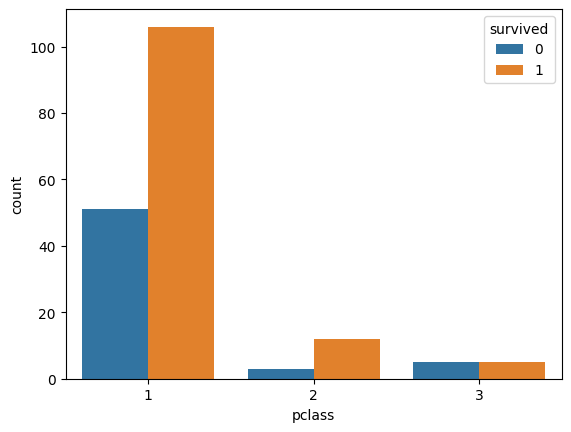

In [27]:
sns.countplot(data=ds, x="pclass", hue="survived")

#### Test ANOVA

In [103]:
import numpy as np
from scipy.stats import f_oneway

# Generamos 3 datasets con la supervivencia de los pasajeros de cada clase
data1 = ds[ds["pclass"]==1]["survived"]
data2 = ds[ds["pclass"]==2]["survived"]
data3 = ds[ds["pclass"]==3]["survived"]

# Realizamos un test ANOVA (H0: todos los grupos tienen la misma media)
statistic, p_value = f_oneway(data1, data2, data3)

print('Estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los pasajeros de todas las clases tienen la misma ratio de superv. O dicho de otra forma, la ratio de supervivencia sí difiere significativamente según la clase del pasajero entre, al menos, 2 de las clases, pero no podemos desglosar los datos para saber cuál es la clase que difiere de las demás')
else:
    print('No Rechazamos la hipótesis nula, por lo que la ratio de supervivencia no difiere significativamente según la clase del pasajero')

Estadístico: 1.3449232755367506 P-value: 0.29478423581419555
No Rechazamos la hipótesis nula, por lo que la ratio de supervivencia no difiere significativamente según la clase del pasajero


#### Test con T-statistic

In [89]:
data1 = ds[ds["pclass"]==1]["survived"]
data23 = ds[ds["pclass"]!=1]["survived"]

t_stats, p_value = stats.ttest_ind(cherbourg, no_cherbourg)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los pasajeros de primera clase tuvieron la misma ratio de supervivencia que TODOS los demás')
else:
    print('No Rechazamos la hipótesis nula de que los pasajeros de primera clase tuvieron la misma ratio de supervivencia que TODOS los demás')

T-estadístico: 1.3449232755367506 P-value: 0.1803421369820683
No Rechazamos la hipótesis nula de que los pasajeros de primera clase tuvieron la misma ratio de supervivencia que TODOS LOS DEMÁS


#### Test con $\chi^2$ (No puede hacerse porque no tienen la misma longitud los datasets como para hacer una tabla)

In [29]:
# No va a funcionar porque los grupos no tienen la misma cantidad de elementos
import numpy as np
from scipy.stats import chi2_contingency

# Asumiendo que data1, 2 y 3 son arrays con recuentos o frecuencias de datos categóricos
# Combina los datasets en una tabla de contingencia
try:
    contingency_table = np.array([data1, data2, data3])

# Hacemos el test chi cuadrado (H0: todos los grupos tienen la misma ratio de supervivencia)
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print('Estadístico Chi^2:', t_stats, 'P-value:', p_value)

    if p_value < 0.05:
        print('Rechazamos la hipótesis nula de que los pasajeros de todas las clases tienen la misma ratio de superv. O dicho de otra forma, la ratio de supervivencia sí difiere significativamente según la clase del pasajero entre, al menos, 2 de las clases, pero no podemos desglosar los datos para saber cuáles')
    else:
        print('No Rechazamos la hipótesis nula, por lo que la ratio de supervivencia no difiere significativamente según la clase del pasajero')
except:
    pass

### Hipótesis 8: Las mujeres y niños tuvieron tasas de supervivencia significativamente superiores a los hombres.

In [30]:
hombres = ds[(ds["sex"]=="male") & (ds["age"]>=7)]["survived"]  #Varones de más de 7 años
mujYniñ = ds[~((ds["sex"]=="male") & (ds["age"]>=7))]["survived"] # Lo contrario a varones de mas de 7 años (mujeres o menores de 7 años)

In [31]:
women_and_children = ds[(ds["sex"] == "female") | (ds["age"] < 7)]["survived"] # Mujeres O menores de 7 años

In [32]:
(mujYniñ == women_and_children).value_counts()

True    94
Name: survived, dtype: int64

Como se ve, es lo mismo

In [33]:
hombres

6      0
21     1
23     1
27     0
54     0
      ..
806    0
857    1
867    0
872    0
889    1
Name: survived, Length: 88, dtype: int64

In [34]:
mujYniñ

1      1
3      1
10     1
11     1
52     1
      ..
853    1
862    1
871    1
879    1
887    1
Name: survived, Length: 94, dtype: int64

In [36]:
t_stats, p_value = stats.ttest_ind(hombres, mujYniñ)
print('T-estadístico:', t_stats, 'P-value:', p_value)

# H0: hombres y mujeres/niños tienen la misma ratio de supervivencia

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los hombres y mujeres/niños tienen la misma ratio de supervivencia')
else:
    print('NO Rechazamos la hipótesis nula de que los hombres y mujeres/niños tienen la misma ratio de supervivencia')

T-estadístico: -9.425790911993124 P-value: 2.1315570153159397e-17
Rechazamos la hipótesis nula de que los hombres y mujeres/niños tienen la misma ratio de supervivencia


In [35]:
print(f"Superv. hombres: {round(hombres.mean()*100,2)}% vs superv. mujeres y niños: {round(mujYniñ.mean()*100,2)}%")

Superv. hombres: 39.77% vs superv. mujeres y niños: 93.62%


### Hipótesis 9: La tarifa del billete está significativamente correlacionada con la probabilidad de supervivencia.

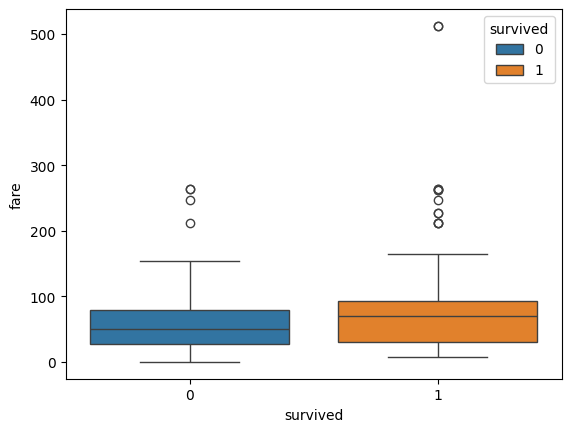

In [37]:
fig = sns.boxplot(data=ds, x="survived", y="fare", hue="survived")

In [38]:
fare_supervivientes = ds[ds["survived"]==1]["fare"]
fare_no_supervivientes = ds[ds["survived"]==0]["fare"]

In [39]:
fare_supervivientes

1      71.2833
3      53.1000
10     16.7000
11     26.5500
21     13.0000
        ...   
862    25.9292
871    52.5542
879    83.1583
887    30.0000
889    30.0000
Name: fare, Length: 123, dtype: float64

In [40]:
fare_no_supervivientes

6       51.8625
27     263.0000
54      61.9792
62      83.4750
75       7.6500
92      61.1750
96      34.6542
102     77.2875
110     52.0000
118    247.5208
124     77.2875
137     53.1000
139     79.2000
148     26.0000
170     33.5000
174     30.6958
177     28.7125
205     10.4625
245     90.0000
251     10.4625
252     26.5500
262     79.6500
263      0.0000
273     29.7000
292     12.8750
297    151.5500
331     28.5000
332    153.4625
336     66.6000
377    211.5000
434     55.9000
438    263.0000
452     27.7500
456     26.5500
462     38.5000
487     29.7000
492     30.5000
498    151.5500
505    108.9000
515     34.0208
536     26.5500
544    106.4250
583     40.1250
625     32.3208
659    113.2750
662     25.5875
671     52.0000
698    110.8833
699      7.6500
715      7.6500
741     78.8500
745     71.0000
748     53.1000
772     10.5000
782     30.0000
789     79.2000
806      0.0000
867     50.4958
872      5.0000
Name: fare, dtype: float64

In [41]:
fare_no_supervivientes.describe()

count     59.000000
mean      64.532131
std       62.108090
min        0.000000
25%       27.150000
50%       50.495800
75%       79.200000
max      263.000000
Name: fare, dtype: float64

In [42]:
fare_supervivientes.describe()

count    123.000000
mean      85.821107
std       81.843522
min        8.050000
25%       30.500000
50%       69.300000
75%       93.500000
max      512.329200
Name: fare, dtype: float64

In [43]:
t_stats, p_value = stats.ttest_ind(fare_supervivientes, fare_no_supervivientes)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los supervivientes pagaron en promedio la misma tarifa que los que no sobrevivieron')
else:
    print('No Rechazamos la hipótesis nula de que los supervivientes pagaron en promedio la misma tarifa que los que no sobrevivieron')


T-estadístico: 1.7677591048731336 P-value: 0.0787954213542355
No Rechazamos la hipótesis nula de que los supervivientes pagaron en promedio la misma tarifa que los que no sobrevivieron


In [92]:
print(f"Tarifa promedio supervivientes: {round(fare_supervivientes.mean(),2)}\nTarifa promedio no supervivientes: {round(fare_no_supervivientes.mean(),2)}")

Tarifa promedio supervivientes: 85.82
Tarifa promedio no supervivientes: 64.53


Con más datos, este resultado podría cambiar

### Hipótesis 10: Los pasajeros de mayor edad tenían una probabilidad significativamente menor de sobrevivir.

In [44]:
ds["age"].describe() # dividimos la población en 2 grupos: menores de 36 años y mayores de 36 años, para dividir la muestra en 2 de mismo tamaño

count    182.000000
mean      35.623187
std       15.671615
min        0.920000
25%       24.000000
50%       36.000000
75%       47.750000
max       80.000000
Name: age, dtype: float64

In [45]:
mayores_36 = ds[ds["age"]>=36]["survived"] # Con la igualdad aquí la muestra se divide más equitativamente
menores_36 = ds[ds["age"]<36]["survived"] # En caso contrario se divide en una ratio 81-101

In [46]:
mayores_36

1      1
6      0
11     1
52     1
54     0
      ..
835    1
857    1
862    1
871    1
879    1
Name: survived, Length: 92, dtype: int64

In [47]:
menores_36

3      1
10     1
21     1
23     1
27     0
      ..
853    1
867    0
872    0
887    1
889    1
Name: survived, Length: 90, dtype: int64

In [48]:
t_stats, p_value = stats.ttest_ind(mayores_36, menores_36)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que los menores de 36 años tenían la misma ratio de supervivencia que los mayores de 36 años')	
else:
    print('NO Rechazamos la hipótesis nula de que los menores de 36 años tenían la misma ratio de supervivencia que los mayores de 36 años')

T-estadístico: -3.301006657630406 P-value: 0.001161659580800739
Rechazamos la hipótesis nula de que los menores de 36 años tenían la misma ratio de supervivencia que los mayores de 36 años


In [93]:
print(f"La ratio de supervivencia de los menores de 36 años fue del {round(menores_36.mean()*100,2)}% y la de los mayores de 36 años fue del {round(mayores_36.mean()*100,2)}%")

La ratio de supervivencia de los menores de 36 años fue del 78.89% y la de los mayores de 36 años fue del 56.52%


### Hipótesis 11: Los hombres que pagaron más por su boleto tuvieron una tasa de supervivencia significativamente mayor que los que pagaron menos

In [49]:
dhombres = ds[ds["sex"]=="male"]

In [50]:
dhombres.describe().T # La fare promedio de los hombres es de 51.93125 

,count,mean,std,min,25%,50%,75%,max
survived,94.0,0.436170,0.498568,0.00,0.00,0.00000,1.0,1.0000
pclass,94.0,1.170213,0.500286,1.00,1.00,1.00000,1.0,3.0000
age,94.0,38.382128,16.503731,0.92,28.00,37.00000,49.0,80.0000
sibsp,94.0,0.404255,0.592410,0.00,0.00,0.00000,1.0,3.0000
parch,94.0,0.414894,0.753623,0.00,0.00,0.00000,1.0,4.0000
fare,94.0,69.482049,83.379823,0.00,26.85,51.93125,79.2,512.3292


In [51]:
hombres_pagos_altos = dhombres[dhombres["fare"] > 51.93125]["survived"] # En este caso la igualdad se puede poner en cualquier lado
hombres_pagos_bajos = dhombres[dhombres["fare"] <= 51.93125]["survived"] # que la muestra se dividirá al centro

In [52]:
hombres_pagos_altos.describe()

count    47.000000
mean      0.446809
std       0.502538
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: survived, dtype: float64

In [53]:
hombres_pagos_bajos.describe()

count    47.000000
mean      0.425532
std       0.499769
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: survived, dtype: float64

In [54]:
t_stats, p_value = stats.ttest_ind(hombres_pagos_altos, hombres_pagos_bajos)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que, de media, los hombres que más pagaron tienen la misma ratio de supervivencia que los que menos pagaron')	
else:
    print('NO Rechazamos la hipótesis nula de que, de media, los hombres que más pagaron tienen la misma ratio de supervivencia que los que menos pagaron')

T-estadístico: 0.20580882974613413 P-value: 0.8373949788694781
NO Rechazamos la hipótesis nula de que, de media, los hombres que más pagaron tienen la misma ratio de supervivencia que los que menos pagaron


In [94]:
print(f"La ratio de supervivencia de los hombres que más pagaron fue del {round(hombres_pagos_altos.mean()*100,2)}% y la de los que menos pagaron fue del {round(hombres_pagos_bajos.mean()*100,2)}%")

La ratio de supervivencia de los hombres que más pagaron fue del 44.68% y la de los que menos pagaron fue del 42.55%


### Hipótesis 12: Los grupos familiares pequeños tenian una tasa de supervivencia significativamente menor que las familias numerosas

In [55]:
ds["family_size"] = ds["sibsp"] + ds["parch"] + 1 # Se añade un +1 porque el pasajero también cuenta como miembro de la familia
# Aunque con esto no podemos identificar núcleos familiares (hombre-mujer-hijos), podemos filtrar igualmente por número de familiares
ds

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True,1
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False,3
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False,3
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True,1
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,2
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,1


<Axes: xlabel='family_size', ylabel='Count'>

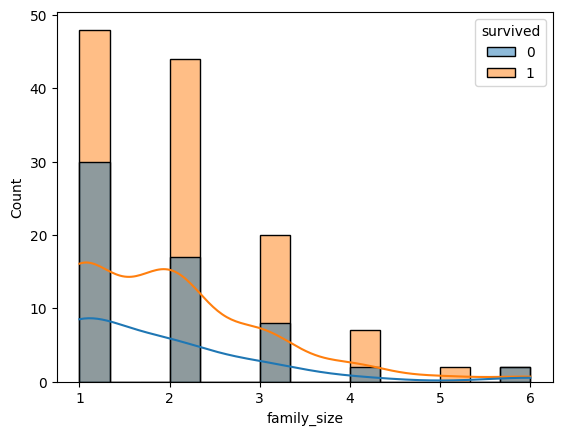

In [56]:
sns.histplot(data=ds, x="family_size", hue="survived", kde=True)

In [57]:
ds["family_size"].describe()

count    182.000000
mean       1.945055
std        1.111096
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        6.000000
Name: family_size, dtype: float64

In [95]:
familia_numerosa = ds[ds["family_size"] > 3]["survived"]
# creamos un ds con los datos de las familias numerosas (más de 3 miembros) y seleccionamos la columna de supervivencia
familia_no_numerosa = ds[ds["family_size"] <= 3]["survived"]
# creamos un ds con los datos de las familias no numerosas (3 o menos miembros) y seleccionamos la columna de supervivencia
# En ambos casos, se incluye al pasajero

In [59]:
familia_no_numerosa.describe()

count    167.000000
mean       0.670659
std        0.471388
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: survived, dtype: float64

In [60]:
familia_numerosa.describe()

count    15.000000
mean      0.733333
std       0.457738
min       0.000000
25%       0.500000
50%       1.000000
75%       1.000000
max       1.000000
Name: survived, dtype: float64

In [61]:
t_stats, p_value = stats.ttest_ind(familia_numerosa, familia_no_numerosa)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la H0 de que los grupos familiares pequeños tienen una tasa de supervivencia igual que las familias numerosas')	
else:
    print('NO Rechazamos la H0 de que los grupos familiares pequeños tienen una tasa de supervivencia igual que las familias numerosas')

T-estadístico: 0.4943654514874315 P-value: 0.6216509060596945
NO Rechazamos la H0 de que los grupos familiares pequeños tienen una tasa de supervivencia igual que las familias numerosas


In [96]:
print(f"La ratio de supervivencia de las familias numerosas fue del {round(familia_numerosa.mean()*100,2)}% y la de las familias no numerosas fue del {round(familia_no_numerosa.mean()*100,2)}%")

La ratio de supervivencia de las familias numerosas fue del 73.33% y la de las familias no numerosas fue del 67.07%


### Hipótesis 13: La distribución de los pasajeros en las clases es independiente del sexo

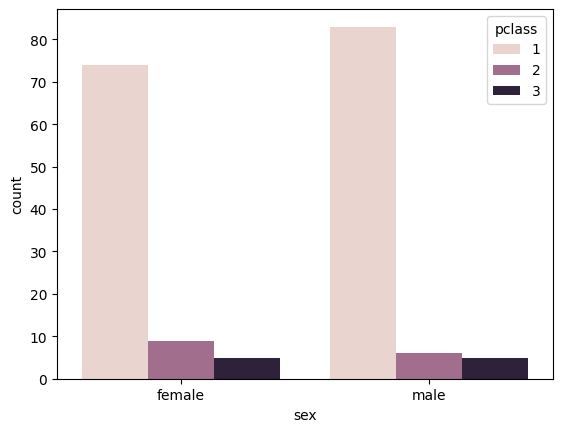

In [62]:
sns.countplot(data=ds, x='sex' , hue='pclass')
plt.show()

In [63]:
contingency_table = pd.crosstab(ds['sex'], ds['pclass'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que la proporción de hombres y mujeres es la misma entre las clases')
else:
    print('No Rechazamos la hipótesis nula de que la proporción de hombres y mujeres es la misma entre las clases')

Chi2: 0.9191202922297922 P-value: 0.6315613791476373
No Rechazamos la hipótesis nula de que la proporción de hombres y mujeres es la misma entre las clases


In [64]:
contingency_table = pd.crosstab(ds['sex'], ds['pclass'])
contingency_table

pclass,1,2,3
sex,,,
female,74,9,5
male,83,6,5


### Hipótesis 14: Los pasajeros que viajaban en la cubierta del barco A tienen una tasa de supervivencia significativamente mayor que los que viajaban en la C


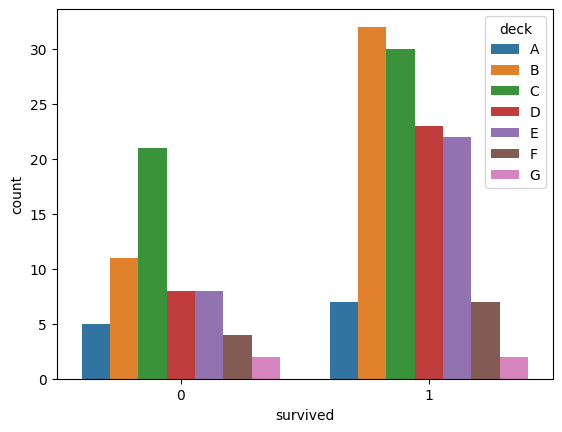

In [65]:
sns.countplot(data=ds, x='survived' , hue='deck')
plt.show()

In [66]:
pasajeros_A = ds[ds["deck"]=="A"]["survived"]
pasajeros_B = ds[ds["deck"]=="B"]["survived"]
pasajeros_C = ds[ds["deck"]=="C"]["survived"]
pasajeros_D = ds[ds["deck"]=="D"]["survived"]
pasajeros_E = ds[ds["deck"]=="E"]["survived"]
pasajeros_F = ds[ds["deck"]=="F"]["survived"]
pasajeros_G = ds[ds["deck"]=="G"]["survived"]

In [67]:
pasajeros_A

23     1
96     0
174    0
209    1
445    1
556    1
583    0
599    1
630    1
647    1
806    0
867    0
Name: survived, dtype: int64

In [68]:
pasajeros_C

1      1
3      1
11     1
27     0
62     0
88     1
110    0
137    0
151    1
177    0
224    1
230    1
245    0
252    0
268    1
269    1
273    0
297    0
305    1
307    1
310    1
318    1
325    1
331    0
332    0
336    0
341    1
377    0
412    1
430    1
438    0
449    1
452    0
453    1
486    1
492    0
498    0
505    0
544    0
550    1
571    1
581    1
609    1
698    0
700    1
710    1
712    1
716    1
741    0
879    1
889    1
Name: survived, dtype: int64

In [69]:
t_stats, p_value = stats.ttest_ind(pasajeros_A, pasajeros_C)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la H0 de que los pasajeros de la cubierta A tienen una tasa de supervivencia igual que los de C')	
else:
    print('NO Rechazamos la H0 de que los pasajeros de la cubierta A tienen una tasa de supervivencia igual que los de C')

T-estadístico: -0.030536991249867848 P-value: 0.9757384864153693
NO Rechazamos la H0 de que los pasajeros de la cubierta A tienen una tasa de supervivencia igual que los de C


In [98]:
print(f"La ratio de supervivencia de los pasajeros de la cubierta C fue del {round(pasajeros_C.mean()*100,2)}%\nLa ratio de supervivencia de los pasajeros de la cubierta A fue del {round(pasajeros_A.mean()*100,2)}%")

La ratio de supervivencia de los pasajeros de la cubierta C fue del 58.82%
La ratio de supervivencia de los pasajeros de la cubierta A fue del 58.33%


In [70]:
t_stats, p_value = stats.ttest_ind(pasajeros_A, pasajeros_B)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la H0 de que los pasajeros de la cubierta A tienen una tasa de supervivencia igual que los de B')	
else:
    print('NO Rechazamos la H0 de que los pasajeros de la cubierta A tienen una tasa de supervivencia igual que los de B')

T-estadístico: -1.0764534928996192 P-value: 0.286600147853019
NO Rechazamos la H0 de que los pasajeros de la cubierta A tienen una tasa de supervivencia igual que los de B


In [71]:
t_stats, p_value = stats.ttest_ind(pasajeros_D, pasajeros_C)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la H0 de que los pasajeros de la cubierta D tienen una tasa de supervivencia igual que los de C')	
else:
    print('NO Rechazamos la H0 de que los pasajeros de la cubierta D tienen una tasa de supervivencia igual que los de C')

T-estadístico: 1.4115304540052913 P-value: 0.16196582929552242
NO Rechazamos la H0 de que los pasajeros de la cubierta D tienen una tasa de supervivencia igual que los de C


In [97]:
print(f"La ratio de supervivencia de los pasajeros de la cubierta C fue del {round(pasajeros_C.mean()*100,2)}%\nLa ratio de supervivencia de los pasajeros de la cubierta D fue del {round(pasajeros_D.mean()*100,2)}%")

La ratio de supervivencia de los pasajeros de la cubierta C fue del 58.82%
La ratio de supervivencia de los pasajeros de la cubierta D fue del 74.19%


In [72]:
t_stats, p_value = stats.ttest_ind(pasajeros_D, pasajeros_F)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la H0 de que los pasajeros de la cubierta D tienen una tasa de supervivencia igual que los de F')	
else:
    print('NO Rechazamos la H0 de que los pasajeros de la cubierta D tienen una tasa de supervivencia igual que los de F')

T-estadístico: 0.6532940562170756 P-value: 0.5173045727104575
NO Rechazamos la H0 de que los pasajeros de la cubierta D tienen una tasa de supervivencia igual que los de F


### Hipótesis 15: Las personas con titulos como Miss o Mrs tenian una tasa de supervivencia significativamente mayor que los Mr

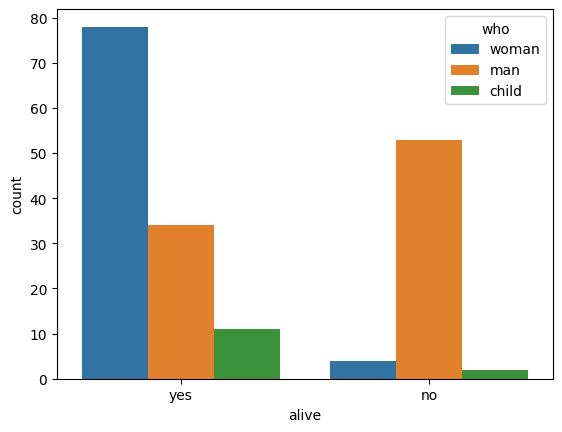

In [73]:
sns.countplot(data=ds, x='alive' , hue='who')
plt.show()

In [100]:
contingency_table = pd.crosstab(ds["who"], ds["survived"])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('Chi2:', chi2, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la hipótesis nula de que la ratio de supervivencia entre hombres, mujeres y niños (3 grupos) es la misma, pero no se puede saber qué grupo difiere')
else:
    print('No Rechazamos la hipótesis nula de que la ratio de supervivencia entre hombres, mujeres y niños (3 grupos) es la misma')

Chi2: 62.36731573884427 P-value: 2.864899962615698e-14
Rechazamos la hipótesis nula de que la ratio de supervivencia entre hombres, mujeres y niños (3 grupos) es la misma, pero no se puede saber qué grupo difiere


In [75]:
contingency_table = pd.crosstab(ds["who"], ds["survived"])
contingency_table

survived,0,1
who,,
child,2,11
man,53,34
woman,4,78


#### Excluyendo a los niños

In [76]:
mr = ds[ds["who"]=="man"]["survived"]
miss = ds[ds["who"]=="woman"]["survived"]

In [77]:
t_stats, p_value = stats.ttest_ind(mr, miss)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la H0 de que hombres y mujeres tuvieron la misma ratio de supervivencia')	
else:
    print('NO Rechazamos la H0 de que hombres y mujeres tuvieron la misma ratio de supervivencia')

T-estadístico: -9.502827288213998 P-value: 2.1739494292055012e-17
Rechazamos la H0 de que hombres y mujeres tuvieron la misma ratio de supervivencia


In [78]:
mr.describe()

count    87.000000
mean      0.390805
std       0.490759
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: survived, dtype: float64

In [79]:
miss.describe()

count    82.000000
mean      0.951220
std       0.216734
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: survived, dtype: float64

In [101]:
print(f"La ratio de supervivencia de los hombres fue del {round(mr.mean()*100,2)}%\nLa ratio de supervivencia de las mujeres fue del {round(miss.mean()*100,2)}%")

La ratio de supervivencia de los hombres fue del 39.08%
La ratio de supervivencia de las mujeres fue del 95.12%


### Hipótesis 16: Las personas que embarcaron en Southhampton en solitario tuvieron una ratio de supervivencia signitivamente superior que las acompañadas

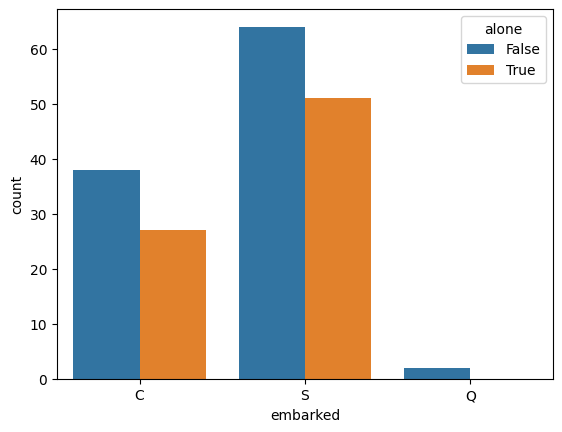

In [80]:
sns.countplot(data=ds, x='embarked' , hue='alone')
plt.show()

In [81]:
South_alone = ds[(ds["embarked"]=="S") & (ds["alone"]==True)]["survived"]
South_group = ds[(ds["embarked"]=="S") & (ds["alone"]==False)]["survived"]

In [82]:
South_group.describe()

count    64.000000
mean      0.687500
std       0.467177
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: survived, dtype: float64

In [83]:
South_alone.describe()

count    51.000000
mean      0.588235
std       0.497050
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: survived, dtype: float64

In [84]:
t_stats, p_value = stats.ttest_ind(South_alone, South_group)
print('T-estadístico:', t_stats, 'P-value:', p_value)

if p_value < 0.05:
    print('Rechazamos la H0 de que Las personas que embarcaron en Southhampton en solitario tuvieron una ratio de supervivencia signitivamente superior')	
else:
    print('NO Rechazamos la H0: las ratios son iguales en ambos grupos')

T-estadístico: -1.1003111512277912 P-value: 0.27353504374926624
NO Rechazamos la H0: las ratios son iguales en ambos grupos


In [102]:
print(f"La ratio de supervivencia de los pasajeros de Southampton que viajaron solos fue del {round(South_alone.mean()*100,2)}%\nLa ratio de supervivencia de los pasajeros de Southampton que viajaron acompañados fue del {round(South_group.mean()*100,2)}%")

La ratio de supervivencia de los pasajeros de Southampton que viajaron solos fue del 58.82%
La ratio de supervivencia de los pasajeros de Southampton que viajaron acompañados fue del 68.75%


# Fin del documento